In [2]:
import os
import requests
import zipfile
import pandas as pd
import numpy as np

def download_mhealth_dataset(url: str, save_path: str):
    """
    Downloads the MHEALTH dataset from the given URL 
    and saves it to `save_path`.
    """
    if not os.path.exists(save_path):
        print(f"Downloading MHEALTH dataset from {url}...")
        r = requests.get(url, stream=True)
        with open(save_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
        print("Download complete.")
    else:
        print("Dataset zip file already exists. Skipping download.")

def unzip_dataset(zip_path: str, extract_to: str):
    """
    Unzips the downloaded dataset to the specified folder.
    """
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted dataset to: {extract_to}")

# URL and local paths
mhealth_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip"
zip_filename = "MHEALTHDATASET.zip"
extract_folder = "MHEALTHDATASET"

# 1) Download the dataset if not already present
download_mhealth_dataset(mhealth_url, zip_filename)

# 2) Unzip the dataset
unzip_dataset(zip_filename, extract_folder)


Dataset zip file already exists. Skipping download.
Extracted dataset to: MHEALTHDATASET


In [3]:
import os
import glob
import pandas as pd

# Your top-level folder after unzipping
extract_folder = "MHEALTHDATASET"

# Path to the second-level folder containing the .log files
nested_folder = os.path.join(extract_folder, "MHEALTHDATASET")

# Verify which files/folders exist
print("Contents of top-level folder:", os.listdir(extract_folder))
print("Contents of nested folder:", os.listdir(nested_folder))

# Now collect all .log files
file_list = sorted(glob.glob(os.path.join(nested_folder, "mHealth_subject*.log")))

if not file_list:
    print("No .log files found. Check that the folder structure is correct.")
else:
    print("Found log files:", file_list)

# Define the column names based on the dataset description
column_names = [
    "chest_acc_x",
    "chest_acc_y",
    "chest_acc_z",
    "ecg_1",
    "ecg_2",
    "ankle_acc_x",
    "ankle_acc_y",
    "ankle_acc_z",
    "ankle_gyro_x",
    "ankle_gyro_y",
    "ankle_gyro_z",
    "ankle_mag_x",
    "ankle_mag_y",
    "ankle_mag_z",
    "arm_acc_x",
    "arm_acc_y",
    "arm_acc_z",
    "arm_gyro_x",
    "arm_gyro_y",
    "arm_gyro_z",
    "arm_mag_x",
    "arm_mag_y",
    "arm_mag_z",
    "activity_label"
]

all_data = []
for log_file in file_list:
    print("Loading file:", log_file)
    df = pd.read_csv(log_file, 
                     delim_whitespace=True, 
                     names=column_names, 
                     header=None)
    
    # Add a subject column for clarity.
    # e.g. "mHealth_subject1.log" => "subject1"
    subject_id = os.path.splitext(os.path.basename(log_file))[0]  # "mHealth_subject1"
    df["subject_id"] = subject_id
    
    all_data.append(df)

# Concatenate all subject data
if all_data:
    mhealth_df = pd.concat(all_data, ignore_index=True)
    print("Combined DataFrame shape:", mhealth_df.shape)
    print(mhealth_df.head())
else:
    print("No data loaded; all_data is empty.")


Contents of top-level folder: ['MHEALTHDATASET']
Contents of nested folder: ['mHealth_subject1.log', 'mHealth_subject10.log', 'mHealth_subject2.log', 'mHealth_subject3.log', 'mHealth_subject4.log', 'mHealth_subject5.log', 'mHealth_subject6.log', 'mHealth_subject7.log', 'mHealth_subject8.log', 'mHealth_subject9.log', 'README.txt']
Found log files: ['MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject1.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject10.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject2.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject3.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject4.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject5.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject6.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject7.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject8.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject9.log']
Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject1.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_39560\586196124.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject10.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_39560\586196124.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject2.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_39560\586196124.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject3.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_39560\586196124.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject4.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_39560\586196124.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject5.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_39560\586196124.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject6.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_39560\586196124.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject7.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_39560\586196124.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject8.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_39560\586196124.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject9.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_39560\586196124.py:54: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Combined DataFrame shape: (1215745, 25)
   chest_acc_x  chest_acc_y  chest_acc_z     ecg_1     ecg_2  ankle_acc_x  \
0      -9.8184     0.009971      0.29563  0.004186  0.004186       2.1849   
1      -9.8489     0.524040      0.37348  0.004186  0.016745       2.3876   
2      -9.6602     0.181850      0.43742  0.016745  0.037677       2.4086   
3      -9.6507     0.214220      0.24033  0.079540  0.117220       2.1814   
4      -9.7030     0.303890      0.31156  0.221870  0.205130       2.4173   

   ankle_acc_y  ankle_acc_z  ankle_gyro_x  ankle_gyro_y  ...  arm_acc_y  \
0      -9.6967      0.63077      0.103900      -0.84053  ...    -4.5781   
1      -9.5080      0.68389      0.085343      -0.83865  ...    -4.3198   
2      -9.5674      0.68113      0.085343      -0.83865  ...    -4.2772   
3      -9.4301      0.55031      0.085343      -0.83865  ...    -4.3163   
4      -9.3889      0.71098      0.085343      -0.83865  ...    -4.1459   

   arm_acc_z  arm_gyro_x  arm_gyro_y  arm_gyro

In [4]:
# Check for missing values
missing_counts = mhealth_df.isnull().sum()
print("Missing values per column:\n", missing_counts)


Missing values per column:
 chest_acc_x       0
chest_acc_y       0
chest_acc_z       0
ecg_1             0
ecg_2             0
ankle_acc_x       0
ankle_acc_y       0
ankle_acc_z       0
ankle_gyro_x      0
ankle_gyro_y      0
ankle_gyro_z      0
ankle_mag_x       0
ankle_mag_y       0
ankle_mag_z       0
arm_acc_x         0
arm_acc_y         0
arm_acc_z         0
arm_gyro_x        0
arm_gyro_y        0
arm_gyro_z        0
arm_mag_x         0
arm_mag_y         0
arm_mag_z         0
activity_label    0
subject_id        0
dtype: int64


# Part 2

In [5]:
from sklearn.preprocessing import StandardScaler

# Columns to scale (exclude label & subject_id)
feature_cols = [
    col for col in mhealth_df.columns 
    if col not in ['activity_label', 'subject_id']
]

scaler = StandardScaler()
mhealth_df[feature_cols] = scaler.fit_transform(mhealth_df[feature_cols])

print("Scaled feature sample:\n", mhealth_df[feature_cols].head())


Scaled feature sample:
    chest_acc_x  chest_acc_y  chest_acc_z     ecg_1     ecg_2  ankle_acc_x  \
0    -0.318024     0.104711     0.378153  0.012468  0.011956     0.180505   
1    -0.325508     0.345048     0.399934  0.012468  0.029230     0.233478   
2    -0.279204     0.185068     0.417824  0.029289  0.058021     0.238966   
3    -0.276873     0.200201     0.362681  0.113398  0.167428     0.179590   
4    -0.289707     0.242124     0.382610  0.304036  0.288343     0.241240   

   ankle_acc_y  ankle_acc_z  ankle_gyro_x  ankle_gyro_y  ...  ankle_mag_z  \
0    -0.000916     0.290303      0.214771     -0.631339  ...     0.065390   
1     0.044322     0.300028      0.176993     -0.626038  ...     0.081415   
2     0.030081     0.299523      0.176993     -0.626038  ...     0.073245   
3     0.062997     0.275571      0.176993     -0.626038  ...     0.081004   
4     0.072874     0.304988      0.176993     -0.626038  ...     0.073660   

   arm_acc_x  arm_acc_y  arm_acc_z  arm_gyro_x  ar

In [6]:
import numpy as np

WINDOW_SIZE = 100  # e.g., 2 seconds if data is 50 Hz

def create_windows(df, window_size=100):
    """
    Splits the dataset into consecutive windows of length `window_size`.
    Each window is assigned a single label based on majority labeling.
    """
    # Sort to maintain temporal order within each subject
    df = df.sort_values(by=['subject_id']).reset_index(drop=True)
    
    feature_cols = [c for c in df.columns if c not in ['activity_label', 'subject_id']]
    data_array = df[feature_cols].values
    labels = df['activity_label'].values
    subjects = df['subject_id'].values
    
    X_windows = []
    y_windows = []
    subject_windows = []
    
    start_idx = 0
    while start_idx + window_size <= len(df):
        end_idx = start_idx + window_size
        
        # Slice data for this window
        window_data = data_array[start_idx:end_idx]
        window_labels = labels[start_idx:end_idx]
        window_subjects = subjects[start_idx:end_idx]
        
        # Majority vote for the label
        unique_labels, counts = np.unique(window_labels, return_counts=True)
        majority_label = unique_labels[np.argmax(counts)]
        
        X_windows.append(window_data)
        y_windows.append(majority_label)
        
        # (Optional) track subject
        unique_subj, subj_counts = np.unique(window_subjects, return_counts=True)
        majority_subj = unique_subj[np.argmax(subj_counts)]
        subject_windows.append(majority_subj)
        
        start_idx = end_idx  # move on (no overlap)
    
    X_windows = np.array(X_windows)  # shape (num_windows, window_size, num_features)
    y_windows = np.array(y_windows)
    subject_windows = np.array(subject_windows)
    
    return X_windows, y_windows, subject_windows

X, y, subj_ids = create_windows(mhealth_df, window_size=WINDOW_SIZE)
print("X shape:", X.shape)  # (num_windows, 100, num_features)
print("y shape:", y.shape)  # (num_windows,)
print("Sample label distribution:", np.unique(y, return_counts=True))


X shape: (12157, 100, 23)
y shape: (12157,)
Sample label distribution: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64), array([8727,  301,  307,  313,  307,  306,  283,  289,  296,  308,  306,
        308,  106], dtype=int64))


In [7]:
from sklearn.model_selection import train_test_split

# Random split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train size:", X_train.shape, y_train.shape)
print("Val size:", X_val.shape, y_val.shape)
print("Test size:", X_test.shape, y_test.shape)


Train size: (8509, 100, 23) (8509,)
Val size: (1824, 100, 23) (1824,)
Test size: (1824, 100, 23) (1824,)


In [8]:
import torch
from torch.utils.data import Dataset, DataLoader

class SensorWindowDataset(Dataset):
    def __init__(self, X, y):
        # Convert to torch tensors
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Dataset objects
train_dataset = SensorWindowDataset(X_train, y_train)
val_dataset = SensorWindowDataset(X_val, y_val)
test_dataset = SensorWindowDataset(X_test, y_test)

# Dataloaders
BATCH_SIZE = 64

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Quick sanity check
xb, yb = next(iter(train_loader))
print("Batch X shape:", xb.shape)  # (batch_size, window_size, num_features)
print("Batch y shape:", yb.shape)





Batch X shape: torch.Size([64, 100, 23])
Batch y shape: torch.Size([64])


In [9]:
import torch.nn as nn
import torch.nn.functional as F

class LSTMActivityClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True  # input shape: (batch, seq, feature)
        )
        
        # Final fully connected for classification
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        # hidden/cell state are automatically initialized to zeros if not provided
        lstm_out, (hn, cn) = self.lstm(x)  # (batch, seq_len, hidden_size), ([num_layers, batch, hidden_size], ...)
        
        # We can take the last time-step's output
        # lstm_out[:, -1, :] shape = (batch, hidden_size)
        out = lstm_out[:, -1, :]
        
        # FC layer for classification
        out = self.fc(out)  # (batch, num_classes)
        return out


In [10]:
num_classes = len(np.unique(y_train))  # number of distinct activity labels
input_size = X_train.shape[2]         # number of sensor features
hidden_size = 64
num_layers = 1

model = LSTMActivityClassifier(input_size, hidden_size, num_classes, num_layers)
print(model)


LSTMActivityClassifier(
  (lstm): LSTM(23, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=13, bias=True)
)


In [11]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def train_one_epoch(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * X_batch.size(0)
        
        _, preds = torch.max(outputs, 1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def evaluate(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            running_loss += loss.item() * X_batch.size(0)
            
            _, preds = torch.max(outputs, 1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

# -- Main training loop --
EPOCHS = 10
for epoch in range(EPOCHS):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    
    print(f"Epoch [{epoch+1}/{EPOCHS}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


Using device: cuda
Epoch [1/10] Train Loss: 1.4600, Train Acc: 0.6319 | Val Loss: 1.0261, Val Acc: 0.7319
Epoch [2/10] Train Loss: 0.9042, Train Acc: 0.7430 | Val Loss: 0.8031, Val Acc: 0.7571
Epoch [3/10] Train Loss: 0.7597, Train Acc: 0.7657 | Val Loss: 0.7046, Val Acc: 0.7610
Epoch [4/10] Train Loss: 0.6632, Train Acc: 0.7801 | Val Loss: 0.6272, Val Acc: 0.7736
Epoch [5/10] Train Loss: 0.6008, Train Acc: 0.7888 | Val Loss: 0.5585, Val Acc: 0.7818
Epoch [6/10] Train Loss: 0.5259, Train Acc: 0.7976 | Val Loss: 0.4937, Val Acc: 0.8065
Epoch [7/10] Train Loss: 0.4757, Train Acc: 0.8066 | Val Loss: 0.4630, Val Acc: 0.8191
Epoch [8/10] Train Loss: 0.4595, Train Acc: 0.8169 | Val Loss: 0.4494, Val Acc: 0.8246
Epoch [9/10] Train Loss: 0.4435, Train Acc: 0.8207 | Val Loss: 0.4602, Val Acc: 0.8070
Epoch [10/10] Train Loss: 0.4162, Train Acc: 0.8304 | Val Loss: 0.4025, Val Acc: 0.8405


In [12]:
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Test Loss: 0.4350, Test Accuracy: 0.8328


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.numpy())

print("Classification Report:\n", classification_report(all_labels, all_preds))
print("Confusion Matrix:\n", confusion_matrix(all_labels, all_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1310
           1       0.70      0.36      0.47        45
           2       0.81      0.46      0.58        46
           3       0.68      0.98      0.80        47
           4       0.78      0.85      0.81        46
           5       0.71      0.54      0.62        46
           6       0.68      0.81      0.74        42
           7       0.55      0.80      0.65        44
           8       0.56      0.68      0.61        44
           9       0.60      0.78      0.68        46
          10       0.83      0.83      0.83        46
          11       0.80      0.96      0.87        46
          12       0.60      0.19      0.29        16

    accuracy                           0.83      1824
   macro avg       0.71      0.70      0.68      1824
weighted avg       0.84      0.83      0.83      1824

Confusion Matrix:
 [[1152    7    5   22   11   10   11

In [14]:
class_names = [
    "Null/Transitional",   # label 0
    "Standing still",      # label 1
    "Sitting & relaxing",  # label 2
    "Lying down",          # label 3
    "Walking",             # label 4
    "Climbing stairs",     # label 5
    "Waist bends forward", # label 6
    "Frontal elev. arms",  # label 7
    "Knees bending",       # label 8
    "Cycling",             # label 9
    "Jogging",             # label 10
    "Running",             # label 11
    "Jump front/back",     # label 12
]
from sklearn.metrics import classification_report, confusion_matrix

print("Detailed Classification Report with Activity Names:\n")
print(classification_report(all_labels, all_preds, target_names=class_names))


Detailed Classification Report with Activity Names:

                     precision    recall  f1-score   support

  Null/Transitional       0.89      0.88      0.89      1310
     Standing still       0.70      0.36      0.47        45
 Sitting & relaxing       0.81      0.46      0.58        46
         Lying down       0.68      0.98      0.80        47
            Walking       0.78      0.85      0.81        46
    Climbing stairs       0.71      0.54      0.62        46
Waist bends forward       0.68      0.81      0.74        42
 Frontal elev. arms       0.55      0.80      0.65        44
      Knees bending       0.56      0.68      0.61        44
            Cycling       0.60      0.78      0.68        46
            Jogging       0.83      0.83      0.83        46
            Running       0.80      0.96      0.87        46
    Jump front/back       0.60      0.19      0.29        16

           accuracy                           0.83      1824
          macro avg       0.71

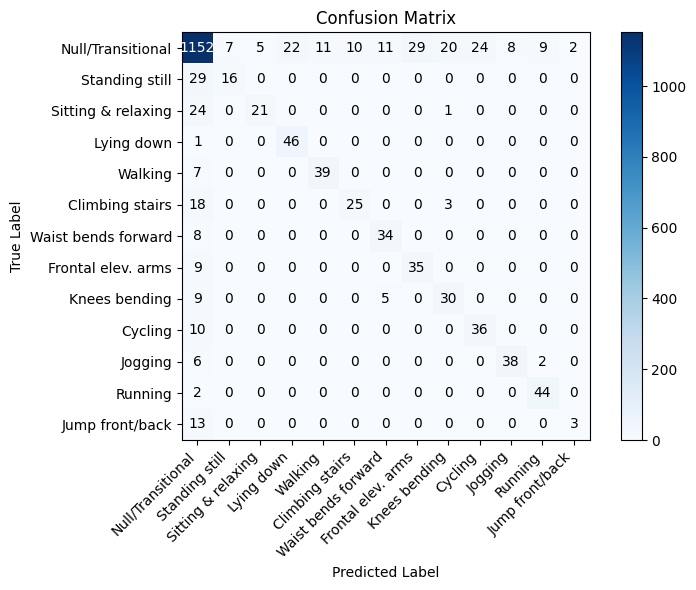

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_labels, all_preds)

def plot_confusion_matrix(cm, class_names):
    """
    Plots a labeled confusion matrix using matplotlib.
    cm: a confusion matrix (2D array)
    class_names: a list of class labels in the same order as the cm's rows/columns
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha="right")
    plt.yticks(tick_marks, class_names)
    
    # Optionally add numerical annotations to each cell
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)


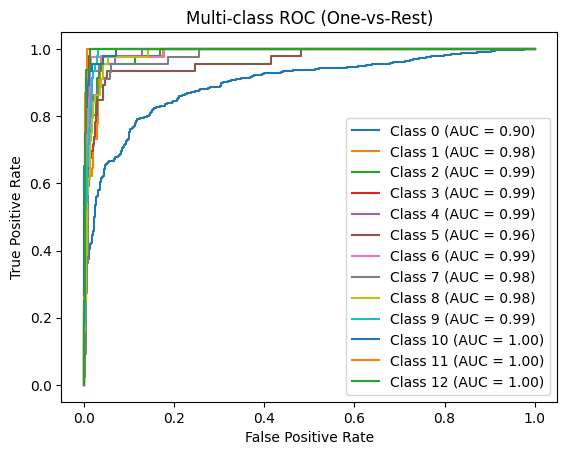

In [16]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# 1) Gather predicted probabilities for the test set
model.eval()
all_probs = []
all_true_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)             # shape (batch_size, num_classes)
        probs = F.softmax(outputs, dim=1)    # convert to probabilities
        all_probs.append(probs.cpu().numpy())
        all_true_labels.append(y_batch.numpy())

all_probs = np.concatenate(all_probs, axis=0)          # shape (num_samples, num_classes)
all_true_labels = np.concatenate(all_true_labels, axis=0)

# 2) Binarize the true labels
unique_labels = np.unique(all_true_labels)
num_classes = len(unique_labels)
y_test_binarized = label_binarize(all_true_labels, classes=unique_labels)

# 3) Plot a ROC curve for each class (One-vs-Rest)
plt.figure()
for i, label in enumerate(unique_labels):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()



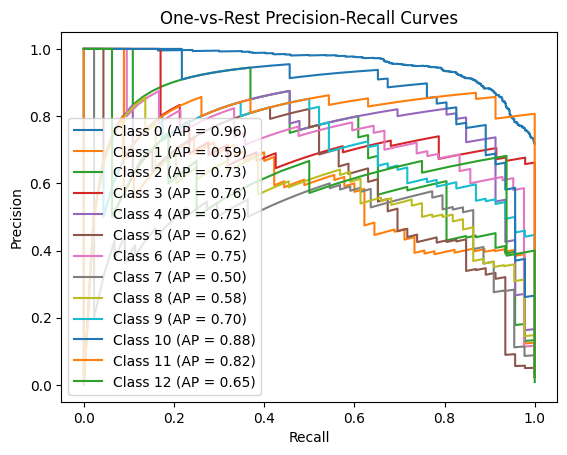

In [17]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1) Gather probabilities (softmax) for each sample on the test set
model.eval()
all_probs = []
all_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        probs = F.softmax(outputs, dim=1)
        all_probs.append(probs.cpu().numpy())
        all_true.append(y_batch.numpy())

all_probs = np.concatenate(all_probs, axis=0)   # shape: (num_samples, num_classes)
all_true = np.concatenate(all_true, axis=0)

# 2) Binarize true labels for multi-class
unique_labels = np.unique(all_true)
y_test_binarized = label_binarize(all_true, classes=unique_labels)

# 3) Plot precision-recall for each class (one-vs-rest)
plt.figure()
for i, label in enumerate(unique_labels):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], all_probs[:, i])
    ap_score = average_precision_score(y_test_binarized[:, i], all_probs[:, i])
    plt.plot(recall, precision, label=f"Class {label} (AP = {ap_score:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("One-vs-Rest Precision-Recall Curves")
plt.legend(loc="lower left")
plt.show()


In [18]:
def downsample_null(df, target_ratio=1.0):
    """
    Downsamples the null (0) class so it's closer to other classes.
    target_ratio=1.0 means we match the null class count to the sum of all others,
    or you can pick a custom strategy.
    """
    # Separate null vs non-null
    df_null = df[df['activity_label'] == 0]
    df_non_null = df[df['activity_label'] != 0]
    
    count_null = len(df_null)
    count_non_null = len(df_non_null)
    
    # Decide how many null samples to keep
    # Example: match total non-null * target_ratio
    keep_null = int(count_non_null * target_ratio)
    keep_null = min(keep_null, count_null)  # can't exceed actual null
    
    # Randomly sample from null
    df_null_downsampled = df_null.sample(n=keep_null, random_state=42)
    
    # Combine
    df_downsampled = pd.concat([df_non_null, df_null_downsampled], axis=0)
    df_downsampled = df_downsampled.sample(frac=1.0, random_state=42).reset_index(drop=True)
    return df_downsampled

# Example usage: reduce null so it's about equal to the sum of other classes
mhealth_df_downsampled = downsample_null(mhealth_df, target_ratio=1.0)
print("After downsampling, shape:", mhealth_df_downsampled.shape)
print(mhealth_df_downsampled['activity_label'].value_counts())


After downsampling, shape: (686390, 25)
activity_label
0     343195
5      30720
1      30720
10     30720
4      30720
11     30720
2      30720
3      30720
9      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64


In [19]:
sensor_cols = [c for c in mhealth_df_downsampled.columns
               if c not in ['activity_label', 'subject_id']]

scaler = StandardScaler()
mhealth_df_downsampled[sensor_cols] = scaler.fit_transform(mhealth_df_downsampled[sensor_cols])


In [20]:
def create_windows(df, window_size=100):
    """
    Splits the dataset into consecutive windows of length `window_size`.
    Each window is assigned a label by majority vote.
    """
    df = df.sort_values(by=['subject_id']).reset_index(drop=True)
    
    feature_cols = [c for c in df.columns if c not in ['activity_label', 'subject_id']]
    data_array = df[feature_cols].values
    labels = df['activity_label'].values
    
    X_windows = []
    y_windows = []
    
    start_idx = 0
    while start_idx + window_size <= len(df):
        end_idx = start_idx + window_size
        
        window_data = data_array[start_idx:end_idx]
        window_labels = labels[start_idx:end_idx]
        
        unique_labels, counts = np.unique(window_labels, return_counts=True)
        majority_label = unique_labels[np.argmax(counts)]
        
        X_windows.append(window_data)
        y_windows.append(majority_label)
        
        start_idx = end_idx  # move window by its size (no overlap)
    
    X_windows = np.array(X_windows)  # (num_windows, window_size, num_features)
    y_windows = np.array(y_windows)
    
    return X_windows, y_windows

WINDOW_SIZE = 100
X, y = create_windows(mhealth_df_downsampled, window_size=WINDOW_SIZE)
print("Windowed data shape:", X.shape, y.shape)


Windowed data shape: (6863, 100, 23) (6863,)


In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (4804, 100, 23) (4804,)
Val: (1029, 100, 23) (1029,)
Test: (1030, 100, 23) (1030,)


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
unique_labels = np.unique(y_train)
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=unique_labels,
    y=y_train
)
class_weights = torch.tensor(class_weights_array, dtype=torch.float).to(device)

print("Unique labels:", unique_labels)
print("Computed class weights:", class_weights_array)


Unique labels: [0]
Computed class weights: [1.]


In [24]:
class SensorDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

BATCH_SIZE = 64

train_dataset = SensorDataset(X_train, y_train)
val_dataset = SensorDataset(X_val, y_val)
test_dataset = SensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [25]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        lstm_out, (hn, cn) = self.lstm(x)
        # take last time step
        out = lstm_out[:, -1, :]  # shape: (batch, hidden_size)
        out = self.fc(out)        # (batch, num_classes)
        return out

input_size = X_train.shape[2]
num_classes = len(unique_labels)  # from earlier
model = LSTMClassifier(input_size, hidden_size=64, num_classes=num_classes, num_layers=1)
model.to(device)

print(model)


LSTMClassifier(
  (lstm): LSTM(23, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [26]:
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
EPOCHS = 10

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    
    for X_batch, y_batch in loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)  # (batch_size, num_classes)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * X_batch.size(0)
        _, preds = torch.max(outputs, 1)
        total_correct += (preds == y_batch).sum().item()
        total_samples += y_batch.size(0)
    
    avg_loss = total_loss / total_samples
    avg_acc = total_correct / total_samples
    return avg_loss, avg_acc

def evaluate(model, loader, criterion):
    model.eval()
    total_loss, total_correct, total_samples = 0, 0, 0
    
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            total_loss += loss.item() * X_batch.size(0)
            _, preds = torch.max(outputs, 1)
            total_correct += (preds == y_batch).sum().item()
            total_samples += y_batch.size(0)
            
    avg_loss = total_loss / total_samples
    avg_acc = total_correct / total_samples
    return avg_loss, avg_acc

for epoch in range(EPOCHS):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    
    print(f"Epoch [{epoch+1}/{EPOCHS}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")


Epoch [1/10] Train Loss: 0.0000 | Train Acc: 1.0000 | Val Loss: 0.0000 | Val Acc: 1.0000
Epoch [2/10] Train Loss: 0.0000 | Train Acc: 1.0000 | Val Loss: 0.0000 | Val Acc: 1.0000
Epoch [3/10] Train Loss: 0.0000 | Train Acc: 1.0000 | Val Loss: 0.0000 | Val Acc: 1.0000
Epoch [4/10] Train Loss: 0.0000 | Train Acc: 1.0000 | Val Loss: 0.0000 | Val Acc: 1.0000
Epoch [5/10] Train Loss: 0.0000 | Train Acc: 1.0000 | Val Loss: 0.0000 | Val Acc: 1.0000
Epoch [6/10] Train Loss: 0.0000 | Train Acc: 1.0000 | Val Loss: 0.0000 | Val Acc: 1.0000
Epoch [7/10] Train Loss: 0.0000 | Train Acc: 1.0000 | Val Loss: 0.0000 | Val Acc: 1.0000
Epoch [8/10] Train Loss: 0.0000 | Train Acc: 1.0000 | Val Loss: 0.0000 | Val Acc: 1.0000
Epoch [9/10] Train Loss: 0.0000 | Train Acc: 1.0000 | Val Loss: 0.0000 | Val Acc: 1.0000
Epoch [10/10] Train Loss: 0.0000 | Train Acc: 1.0000 | Val Loss: 0.0000 | Val Acc: 1.0000


In [27]:
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Gather predictions for classification report
from sklearn.metrics import confusion_matrix, classification_report

model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(y_batch.numpy())

print("\nClassification Report:\n")
print(classification_report(all_targets, all_preds))


Test Loss: 0.0000, Test Acc: 1.0000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030

    accuracy                           1.00      1030
   macro avg       1.00      1.00      1.00      1030
weighted avg       1.00      1.00      1.00      1030

